In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices
1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой
2.1.4 Изучите распределение года постройки

Условие 2: 2 задача

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

## ДЗ №4

### 1.2 Изучите стоимости недвижимости

In [5]:
df = pd.read_csv('kc_house_data.csv', encoding='cp1251')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df['price'].min(), df['price'].mean(), df['price'].max()

(75000.0, 540088.1417665294, 7700000.0)

In [37]:
df['price'].max()/df['price'].min(), df['price'].max()/df['price'].mean()

(102.66666666666667, 14.256932164469877)

In [38]:
data1 = df.groupby('price')['view'].sum().reset_index()
data1.head()

,price,view
0,75000.0,0
1,78000.0,0
2,80000.0,0
3,81000.0,0
4,82000.0,0


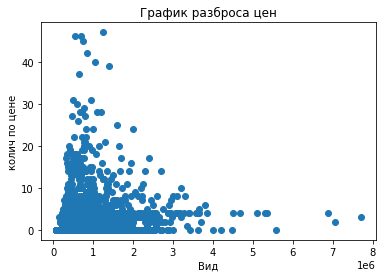

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(data1['price'], data1['view'])
plt.title('График разброса цен')
plt.xlabel('Вид')
plt.ylabel('колич по цене');

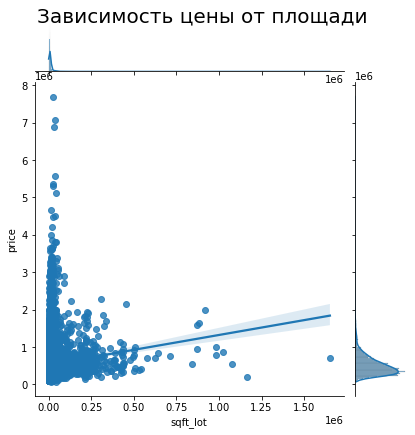

In [25]:
p = sns.jointplot(x=df['sqft_lot'], y=df['price'], kind='reg');
p.fig.suptitle('Зависимость цены от площади',
               y = 1,
               fontsize = 20);

слабая корреляция между ценой и площадью. Рост цен при самом маленьком значении площади

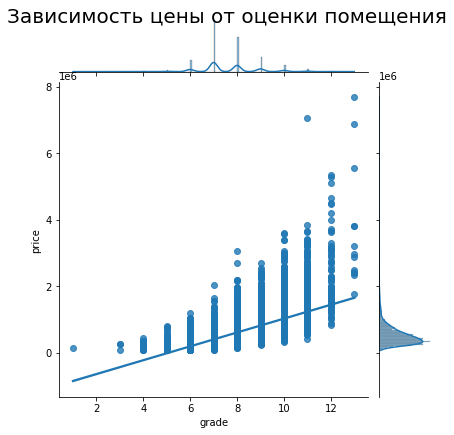

In [28]:
pp = sns.jointplot(x=df['grade'], y=df['price'], kind='reg')
pp.fig.suptitle('Зависимость цены от оценки помещения',
               y = 1,
               fontsize = 20);

Выводы:
    1. максимальная и минимальная цены отличаются в 102 раза
    2. на стоимость помещения не влияет его площадь
    3. на стоимость помещения влияет его оценка

### 1.3 Изучите распределение квадратуры жилой

In [50]:
data2 = df['sqft_living'].value_counts().reset_index()
data2.head(10)

,index,sqft_living
0,1300,138
1,1400,135
2,1440,133
3,1800,129
4,1660,129
5,1010,129
6,1820,128
7,1480,125
8,1720,125
9,1540,124


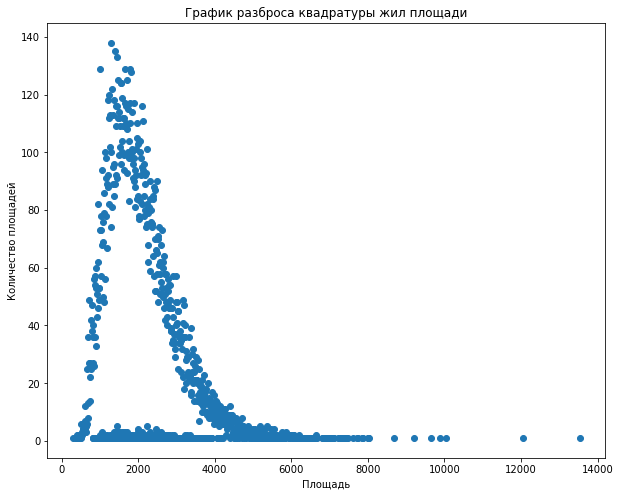

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(data2['index'], data2['sqft_living'])
plt.title('График разброса квадратуры жил площади')
plt.xlabel('Площадь')
plt.ylabel('Количество площадей');

### 1.4 Изучите распределение года постройки

In [55]:
data3 = df['yr_built'].value_counts().reset_index()
data3.head(3)

,index,yr_built
0,2014,559
1,2006,454
2,2005,450


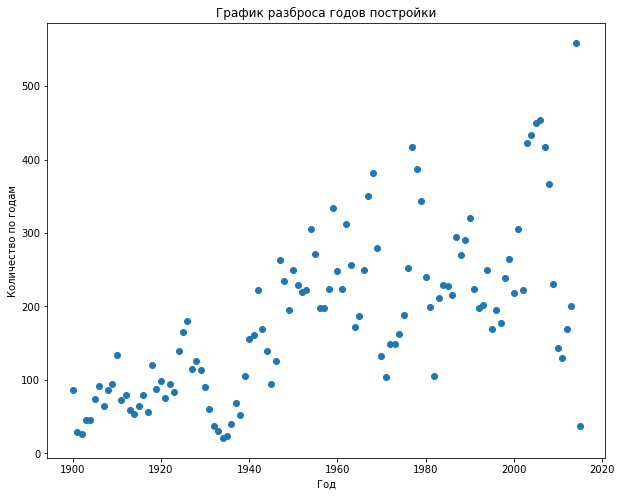

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(data3['index'], data3['yr_built'])
plt.title('График разброса годов постройки')
plt.xlabel('Год')
plt.ylabel('Количество по годам');

In [93]:
data4 = df['yr_built'].value_counts().reset_index()
data4.head(3)

,index,yr_built
0,2014,559
1,2006,454
2,2005,450


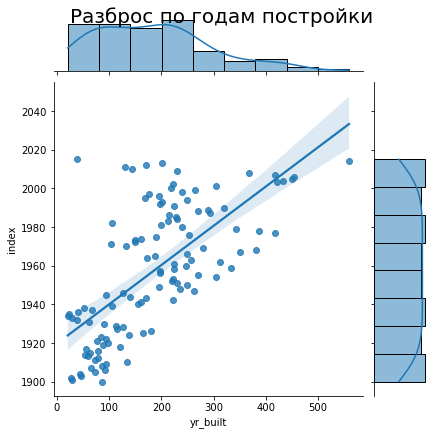

In [94]:
p14 = sns.jointplot(data=data4, y=data4['index'], x=data4['yr_built'], kind='reg')
p14.fig.suptitle('Разброс по годам постройки',
               y = 1,
               fontsize = 20);

In [ ]:
Вывод: со временем количество вводимого в эксплуатацию жилья растёт

## Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

In [110]:
# data5 = df[df['view'] != 0].value_counts().reset_index()
data5 = df['waterfront'].value_counts()
data5.index = ['без вида', 'с видом на набереж']
data5.head(5)

без вида              21450
с видом на набереж      163
Name: waterfront, dtype: int64

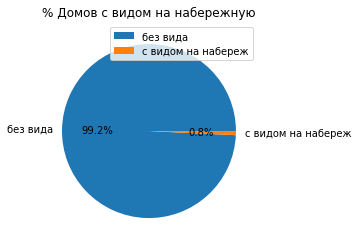

In [111]:
plt.figure(figsize=(6,4))
plt.pie(data5, autopct='%1.1f%%', labels=data5.index)
plt.title('% Домов с видом на набережную')
plt.legend(data5.index)

Вывод: почти все дома находятся не на первой линии, без вида на набережную

### 2.2 Изучите распределение этажей домов

In [152]:
# data6 = df['floors'].value_counts().reset_index().sort_values('index', inplace=False)
data6 = df['floors'].value_counts().reset_index()
data6.head(5)

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161


Text(0, 0.5, 'Количество домов')

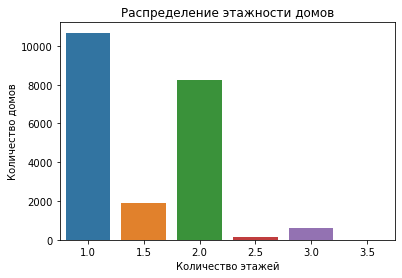

In [154]:
plt.figure(figsize=(6,4))
sns.barplot(x=data6['index'], y=data6['floors'])
plt.title('Распределение этажности домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')


Вывод: Большинство домов одно- и двухэтажные

### 2.2 Изучите распределение состояния домов


In [228]:
# data7 = df['condition'].value_counts().reset_index()
# data7 = df['condition'].value_counts()
data7 = df['condition'].value_counts().sort_values('index')
# data7.index = ['без вида', 'с видом на набереж']
data7.head(5)

C:\Users\Acer\AppData\Local\Temp/ipykernel_24904/2503392108.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  data7 = df['condition'].value_counts().sort_values('index')


1       30
2      172
5     1701
4     5679
3    14031
Name: condition, dtype: int64

Text(0.5, 1.0, '% Распределение домов по их состоянию')

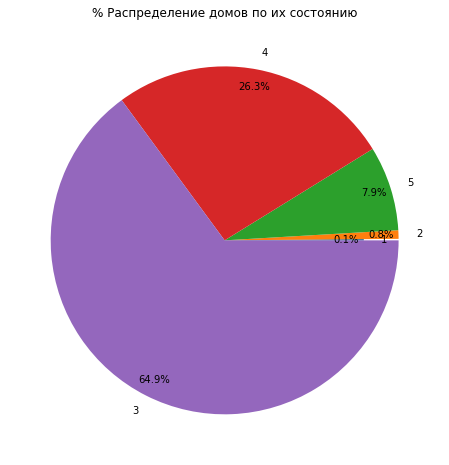

In [229]:
plt.figure(figsize=(12,8))
myexplode = [-0.2, 0, 0, 0, 0]
plt.pie(data7, autopct='%1.1f%%', labels=data7.index, pctdistance=0.9, explode=myexplode) # '%1.1f%%' Колич знаков после запятой
plt.title('% Распределение домов по их состоянию')
# plt.legend(data7.index)

Вывод: большинство домов находятся в среднем и хорошем состоянии. В очень плохом - очень мало домов

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [ ]:
У нас есть база домов с различными параметрами. Попробуем определить, от чего зависит стоимость дома.
Проверим несколько показателей. 
Посмиотрим, сколько домов имеет хороший вид (более 4)

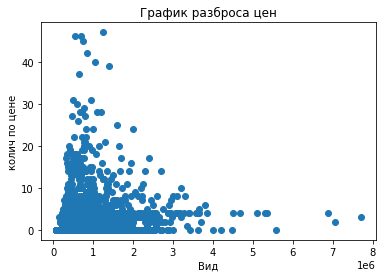

In [230]:
data1 = df.groupby('price')['view'].sum().reset_index()
data1.head()
plt.figure(figsize=(6,4))
plt.scatter(data1['price'], data1['view'])
plt.title('График разброса цен')
plt.xlabel('Вид')
plt.ylabel('колич по цене');

Мы видим, что основная ценовая категория домов имеет вид ниже среднего.

In [ ]:
Наверняка стоимость дома должны зависеть от его площади, проверим эту гепотезу:

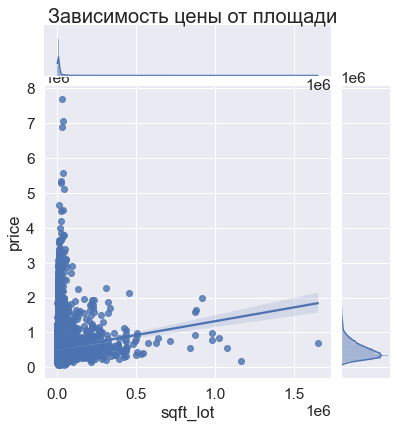

In [241]:
p = sns.jointplot(x=df['sqft_lot'], y=df['price'], kind='reg');
p.fig.suptitle('Зависимость цены от площади',
               y = 1,
               fontsize = 20);

Как ни странно, самый дорогие дома имеют относительно небольшую площадь. Значит цена почти не коррелирует с площадью дома.

Может влияет только жилая площадь (полезная):


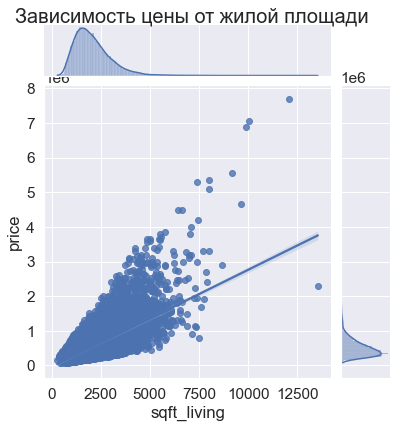

In [248]:
p = sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');
p.fig.suptitle('Зависимость цены от жилой площади',
               y = 1,
               fontsize = 20);

In [ ]:
Теперь видим, что зависимость есть, но она ограничивается диапазоном от небольшой площади до средней, далее жил площадь может 
и влияет на цену, но самих предложений с такой площадью уже мало, поэтому и варантов там не наблюдается.

Проверим, влияет ли оценка дома на его цену:

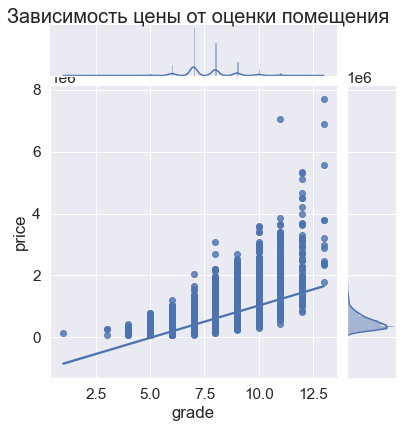

In [243]:
pp = sns.jointplot(x=df['grade'], y=df['price'], kind='reg')
pp.fig.suptitle('Зависимость цены от оценки помещения',
               y = 1,
               fontsize = 20);

Здесь наблюдается прямая линейная зависимость стоимость дома от его оценки. Чем выше оценка дома (по всем его параметрам), 
тем выше его цена.

In [ ]:
Наконец, построим таблицу корреляций, проверим, от чего еще может зависеть цена:

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

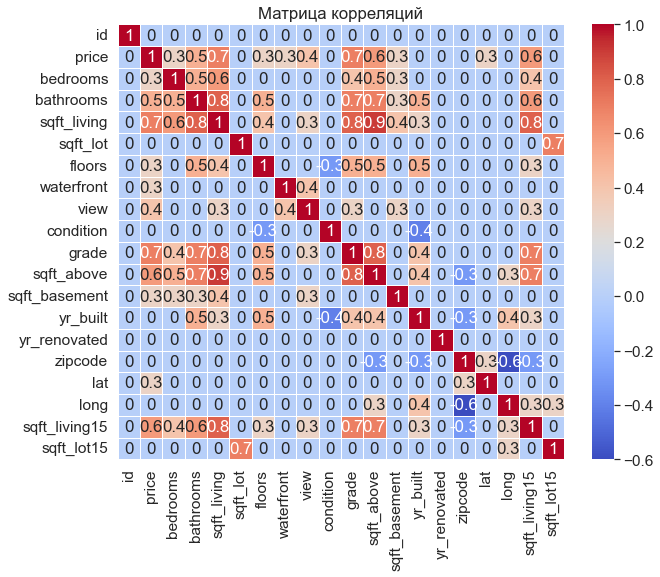

In [236]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций');

Таблица подтверждает проведенный выше визуальный анализ зависимостей.
При выборе дома по цене стоит орентировать на его жилую площадь и оценку, остальные параметры слабо влияют. 
При этом можно купить огромный дом по сравнительно небольшой цене, но его состояние, возможно, будет среднее. Скорее всего, на это влияют и другие факторы: налоги, стоимость обслуживания и т.п., поэтому большой дом сложнее продать, из-за чего продавцы снижают на них цены.